In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

import rasterio
from rasterio.plot import show
import cartopy.crs as ccrs # probably needs to be installed with pip...
import pyproj
from shapely.geometry import Point

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## Check stations

In [3]:
ws = pd.read_csv('./data/weather_station_list.csv')
ws.head()

,station_id,start_date,end_date,elevation,ycoord,xcoord,name
0,355,19470101,19891031,140,49.6789,8.6276,Bensheim
1,917,19950801,20240311,162,49.8809,8.6779,Darmstadt
2,918,19871001,19950731,122,49.8453,8.6240,Darmstadt
3,919,19370203,19740731,169,49.8697,8.6796,Darmstadt-Botanischer
4,920,19490101,19870930,108,49.8564,8.5929,Darmstadt


In [4]:
# Create a geometry column with Point objects
geometry = [Point(x, y) for x, y in zip(ws['xcoord'], ws['ycoord'])]

# Create a GeoDataFrame from the DataFrame and geometry column
ws = gpd.GeoDataFrame(ws, geometry=geometry, crs='EPSG:4326')
ws.start_date = pd.to_datetime(ws.start_date)
ws.end_date = pd.to_datetime(ws.end_date)
ws.head()

,station_id,start_date,end_date,elevation,ycoord,xcoord,name,geometry
0,355,1970-01-01 00:00:00.019470101,1970-01-01 00:00:00.019891031,140,49.6789,8.6276,Bensheim,POINT (8.62760 49.67890)
1,917,1970-01-01 00:00:00.019950801,1970-01-01 00:00:00.020240311,162,49.8809,8.6779,Darmstadt,POINT (8.67790 49.88090)
2,918,1970-01-01 00:00:00.019871001,1970-01-01 00:00:00.019950731,122,49.8453,8.6240,Darmstadt,POINT (8.62400 49.84530)
3,919,1970-01-01 00:00:00.019370203,1970-01-01 00:00:00.019740731,169,49.8697,8.6796,Darmstadt-Botanischer,POINT (8.67960 49.86970)
4,920,1970-01-01 00:00:00.019490101,1970-01-01 00:00:00.019870930,108,49.8564,8.5929,Darmstadt,POINT (8.59290 49.85640)


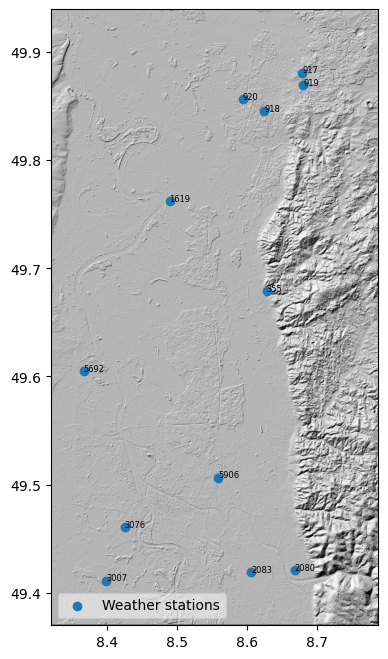

In [5]:
# Load hillshade DEM
dem_path = './data/dem/bergstraße30_shaded.tif'
with rasterio.open(dem_path) as src:
    dem = src.read(1)
    extent = src.bounds

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 8), 
                       #subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
ax.imshow(dem, 
          extent=(extent[0], extent[2], extent[1], extent[3]), 
          cmap='gray', origin='upper', aspect='auto')

ws.plot(ax=ax, label='Weather stations')

for index, row in ws.iterrows():
    ax.annotate(row['station_id'], 
                (row['geometry'].x, row['geometry'].y),
                fontsize=6)

ax.legend(loc='lower left', framealpha=0.5)

# Show the plot
plt.show()

In [6]:
gs = pd.read_csv('./data/groundwater/bergstraße/gw_stations_bergstraße.csv')#, sep=';')
gs.head()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan
0,12890,458821.0,5505747.0,1969-01-01,2010-08-18,87.44,87.95,15204 days
1,12891,462960.0,5505877.0,1951-01-01,1973-08-01,89.96,90.01,8248 days
2,12892,455982.0,5505917.0,1951-01-01,2024-03-01,89.10,89.40,26723 days
3,12893,461080.0,5505917.0,1951-01-01,1982-06-30,88.17,88.03,11503 days
4,12894,457072.0,5505927.0,1951-01-01,2007-05-01,88.13,88.49,20574 days


In [7]:
gs.start_date = pd.to_datetime(gs.start_date)
gs.end_date = pd.to_datetime(gs.end_date)
gs.lifespan = pd.to_timedelta(gs.lifespan)
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   station_id    214 non-null    int64          
 1   x             214 non-null    float64        
 2   y             214 non-null    float64        
 3   start_date    214 non-null    datetime64[ns] 
 4   end_date      214 non-null    datetime64[ns] 
 5   ground_elev   214 non-null    float64        
 6   measure_elev  214 non-null    float64        
 7   lifespan      214 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), timedelta64[ns](1)
memory usage: 13.5 KB


In [8]:
# Create a geometry column with Point objects
geometry = [Point(x, y) for x, y in zip(gs['x'], gs['y'])]

# Create a GeoDataFrame from the DataFrame and geometry column
gs = gpd.GeoDataFrame(gs, geometry=geometry, crs='EPSG:32632')
gs = gs.to_crs('EPSG:4326')
gs.head()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry
0,12890,458821.0,5505747.0,1969-01-01,2010-08-18,87.44,87.95,15204 days,POINT (8.42892 49.70283)
1,12891,462960.0,5505877.0,1951-01-01,1973-08-01,89.96,90.01,8248 days,POINT (8.48631 49.70426)
2,12892,455982.0,5505917.0,1951-01-01,2024-03-01,89.10,89.40,26723 days,POINT (8.38953 49.70415)
3,12893,461080.0,5505917.0,1951-01-01,1982-06-30,88.17,88.03,11503 days,POINT (8.46023 49.70451)
4,12894,457072.0,5505927.0,1951-01-01,2007-05-01,88.13,88.49,20574 days,POINT (8.40465 49.70432)


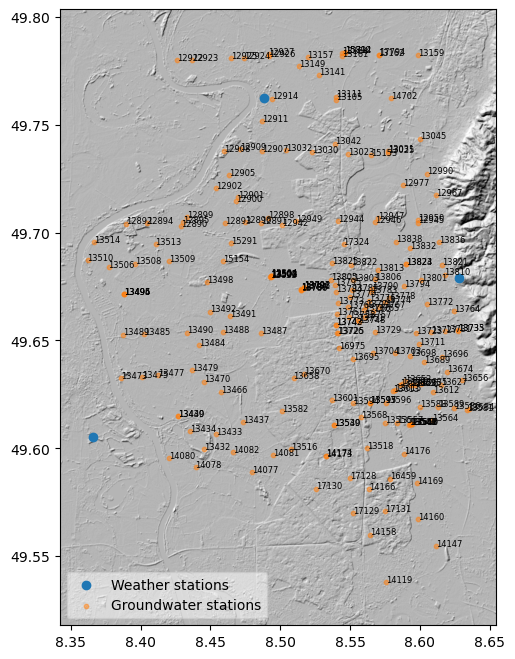

In [9]:
# Load hillshade DEM
dem_path = './data/dem/bergstraße30_shaded.tif'
gs_extent = gs.geometry.total_bounds

with rasterio.open(dem_path) as src:
    dem = src.read(1)
    dem_extent = src.bounds

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 8), 
                       #subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
ax.imshow(dem, extent=(dem_extent[0], dem_extent[2],
                       dem_extent[1], dem_extent[3]),
          cmap='gray', origin='upper', aspect='auto')

ws.plot(ax=ax, label='Weather stations')
gs.plot(ax=ax, label='Groundwater stations', alpha=0.5, markersize=10)

for index, row in gs.iterrows():
    ax.annotate(row['station_id'], 
                (row['geometry'].x, row['geometry'].y),
                fontsize=6)

ax.set_xlim(gs_extent[0]-0.02, gs_extent[2]+0.02)
ax.set_ylim(gs_extent[1]-0.02, gs_extent[3]+0.02)

ax.legend(loc='lower left', framealpha=0.5)

# Show the plot
plt.show()

## Load groundwater station data

In [10]:
g = pd.read_csv('./data/groundwater/bergstraße/gw.csv')
#g = pd.read_csv('./data/groundwater/pfalz/gw.csv')

g.date = pd.to_datetime(g.date)
g.set_index('date', inplace=True)
g.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 557260 entries, 1979-01-01 to 2024-03-18
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   station_id   557260 non-null  int64  
 1   water_dist   554273 non-null  float64
 2   water_level  554273 non-null  float64
 3   water_depth  554273 non-null  float64
 4   water_temp   66890 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 25.5 MB


In [11]:
g.describe()

,station_id,water_dist,water_level,water_depth,water_temp
count,557260.000000,554273.000000,554273.000000,554273.000000,66890.00000
mean,13589.102144,3.594004,89.469690,3.220631,12.27388
std,609.112889,1.527469,3.005891,1.476485,1.55057
min,12890.000000,0.000000,81.140000,-0.870000,2.02000
25%,13157.000000,2.500000,86.900000,2.100000,11.30000
50%,13568.000000,3.360000,89.240000,3.030000,12.00000
75%,13774.000000,4.400000,92.090000,4.040000,12.90000
max,17794.000000,11.160000,96.270000,10.790000,21.30000


In [12]:
g.head()

,station_id,water_dist,water_level,water_depth,water_temp
date,,,,,
1979-01-01,13595,9.48,89.76,8.45,NaN
1979-01-08,13595,9.49,89.75,8.46,NaN
1979-01-15,13595,9.89,89.35,8.86,NaN
1979-01-29,13595,9.98,89.26,8.95,NaN
1979-02-05,13595,10.00,89.24,8.97,NaN


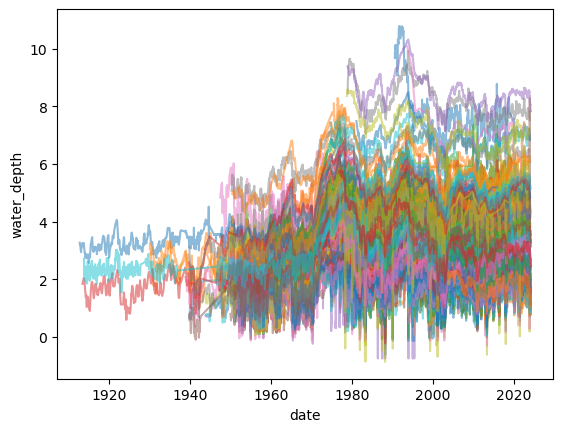

In [13]:
import seaborn as sns
#sns.set_style("white")
#sns.color_palette('tab10')

sns.lineplot(x="date", y="water_depth",
             hue="station_id", 
             #style="event",
             palette='tab10',
             alpha=0.5,
             data=g.reset_index(), # reset_index strangely needed for bergstraße data...
            legend=False
            )

# Set the x-axis limits
#start_date = pd.to_datetime('1950-01-01')
#end_date = pd.to_datetime('1960-01-10')
#plt.xlim(start_date, end_date)

# Show the plot
plt.show()


In [14]:
gs.sort_values(by='lifespan', ascending=False).head()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry
10,12901,461760.0,5507216.0,1912-01-01,2024-03-01,90.56,90.48,40968 days,POINT (8.46954 49.71623)
101,13582,463989.0,5496211.0,1913-01-01,2024-03-01,92.91,93.40,40602 days,POINT (8.50147 49.61739)
87,13518,468337.0,5494261.0,1936-01-01,2024-03-01,96.27,96.27,32202 days,POINT (8.56182 49.60009)
36,13030,465599.0,5509535.0,1937-01-01,2024-03-01,90.82,90.92,31836 days,POINT (8.52258 49.73732)
177,13813,468957.0,5503418.0,1940-01-01,2024-03-01,93.31,93.36,30741 days,POINT (8.56967 49.68249)


In [15]:
aggregated = g.groupby('station_id').agg({'water_level': 'mean',
                                         'water_depth': 'mean',
                                         'water_temp': 'mean'}).reset_index()
aggregated = aggregated.rename(columns={'water_level': 'mean_water_level',
                                         'water_depth': 'mean_water_depth',
                                         'water_temp': 'mean_water_temp'})
gs_agg = gpd.GeoDataFrame(pd.merge(gs, aggregated, on='station_id', how='left'),
                          geometry='geometry')

In [16]:
gs_agg.head()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry,mean_water_level,mean_water_depth,mean_water_temp
0,12890,458821.0,5505747.0,1969-01-01,2010-08-18,87.44,87.95,15204 days,POINT (8.42892 49.70283),85.754006,1.685994,NaN
1,12891,462960.0,5505877.0,1951-01-01,1973-08-01,89.96,90.01,8248 days,POINT (8.48631 49.70426),88.045692,1.914308,NaN
2,12892,455982.0,5505917.0,1951-01-01,2024-03-01,89.10,89.40,26723 days,POINT (8.38953 49.70415),85.506581,3.593419,NaN
3,12893,461080.0,5505917.0,1951-01-01,1982-06-30,88.17,88.03,11503 days,POINT (8.46023 49.70451),86.768671,1.401329,NaN
4,12894,457072.0,5505927.0,1951-01-01,2007-05-01,88.13,88.49,20574 days,POINT (8.40465 49.70432),85.489963,2.640037,NaN


In [17]:
gs_agg.describe()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,mean_water_level,mean_water_depth,mean_water_temp
count,214.000000,214.000000,2.140000e+02,214,214,214.000000,214.000000,214,213.000000,213.000000,27.000000
mean,13695.831776,466120.712121,5.501813e+06,1968-07-19 06:10:05.607476632,2017-04-27 23:19:37.570093568,92.942523,93.362383,17814 days 17:09:31.962616832,89.701578,3.230629,12.138599
min,12890.000000,453983.000000,5.487354e+06,1912-01-01 00:00:00,1966-01-01 00:00:00,86.450000,86.500000,134 days 00:00:00,83.935770,0.968683,10.746667
25%,13437.500000,462975.000000,5.497298e+06,1954-04-02 06:00:00,2024-03-01 00:00:00,90.542500,90.860000,15240 days 00:00:00,87.152689,2.175290,11.506146
50%,13594.500000,467208.000000,5.501563e+06,1973-12-28 12:00:00,2024-03-01 00:00:00,93.170000,93.435000,17592 days 00:00:00,89.739736,3.024300,11.946996
75%,13782.000000,469934.500000,5.505762e+06,1978-01-01 00:00:00,2024-03-01 00:00:00,95.295000,95.760000,23711 days 12:00:00,91.988125,4.023014,12.562876
max,17794.000000,473615.000000,5.514651e+06,2013-01-01 00:00:00,2024-03-01 00:00:00,99.920000,100.560000,40968 days 00:00:00,94.533442,8.493808,14.117103
std,821.378796,4790.694434,6.067589e+03,NaN,NaN,2.945119,3.001687,6962 days 15:07:51.718233088,2.862547,1.388304,0.869294


<Axes: ylabel='Frequency'>

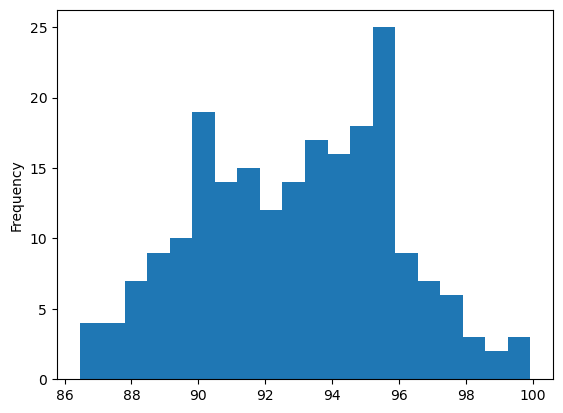

In [18]:
gs_agg['ground_elev'].plot(kind='hist', bins=20)

<Axes: xlabel='ground_elev', ylabel='mean_water_level'>

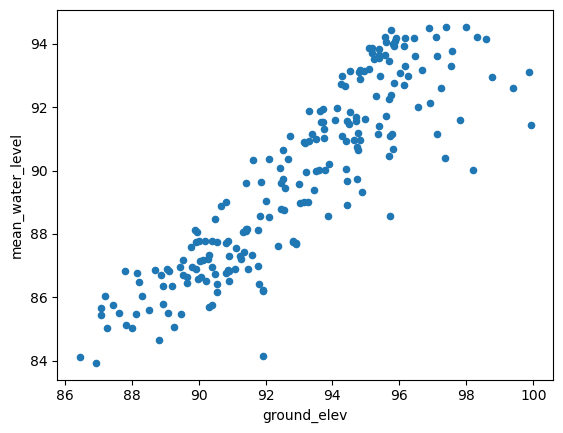

In [19]:
gs_agg.plot(kind='scatter', x='ground_elev', y='mean_water_level')

<Axes: xlabel='ground_elev', ylabel='mean_water_depth'>

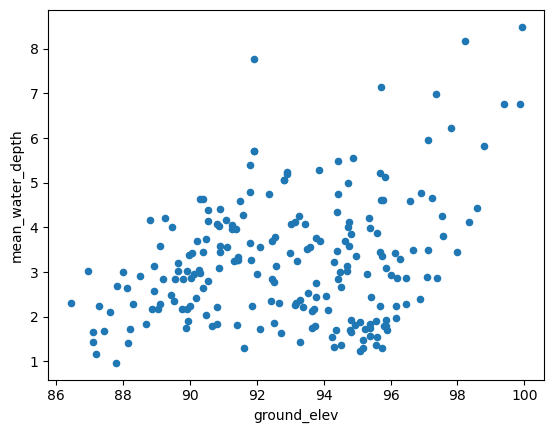

In [20]:
gs_agg.plot(kind='scatter', x='ground_elev', y='mean_water_depth')

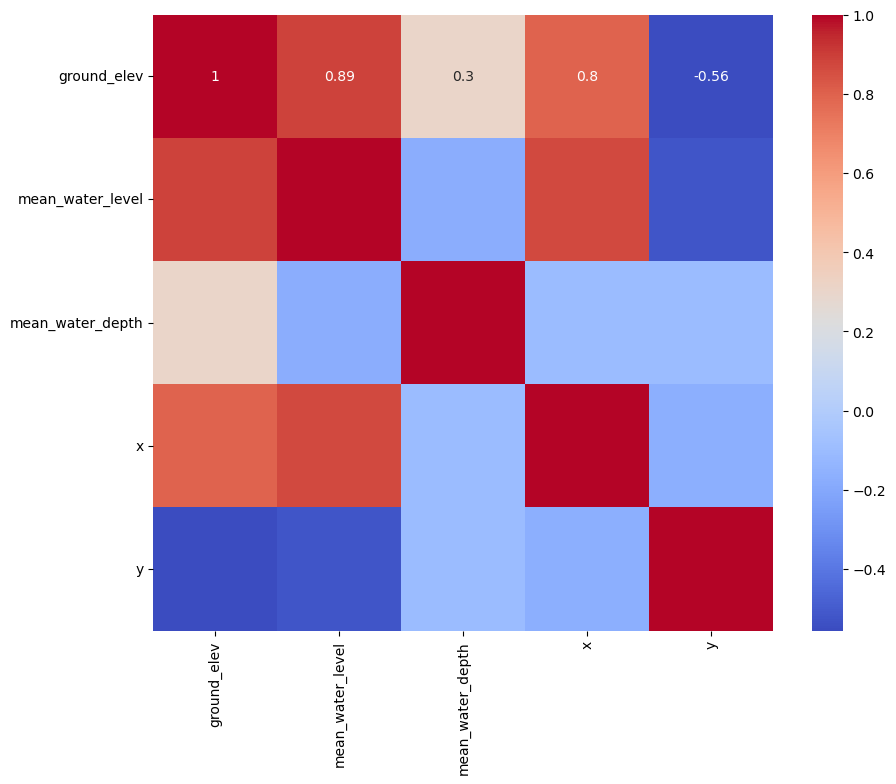

In [21]:
corr_mat = gs_agg[['ground_elev', 'mean_water_level', 'mean_water_depth', 'x', 'y']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

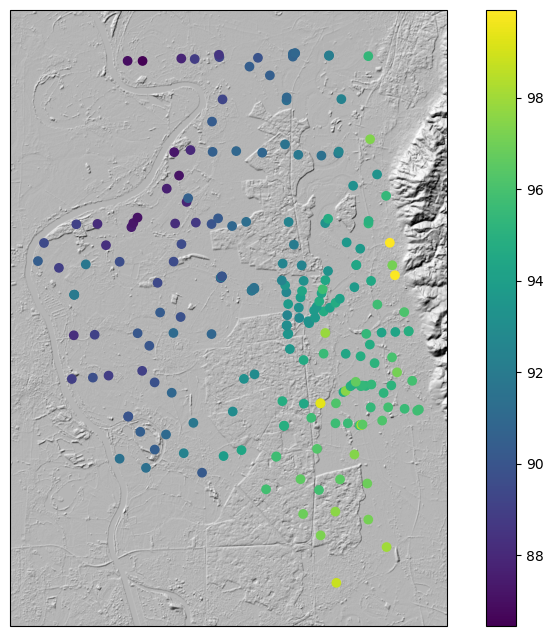

In [22]:
# Load hillshade DEM
dem_path = './data/dem/bergstraße30_shaded.tif'
gs_extent = gs.geometry.total_bounds

with rasterio.open(dem_path) as src:
    dem = src.read(1)
    dem_extent = src.bounds

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 8), 
                       subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
ax.imshow(dem, extent=(dem_extent[0], dem_extent[2],
                       dem_extent[1], dem_extent[3]),
          cmap='gray', origin='upper', aspect='auto')

gs_agg.plot(column='ground_elev',
            #cmap='coolwarm',
            legend=True, 
            ax=ax)

ax.set_xlim(gs_extent[0]-0.02, gs_extent[2]+0.02)
ax.set_ylim(gs_extent[1]-0.02, gs_extent[3]+0.02)

#ax.legend(loc='lower left', framealpha=0.5)

# Show the plot
plt.show()

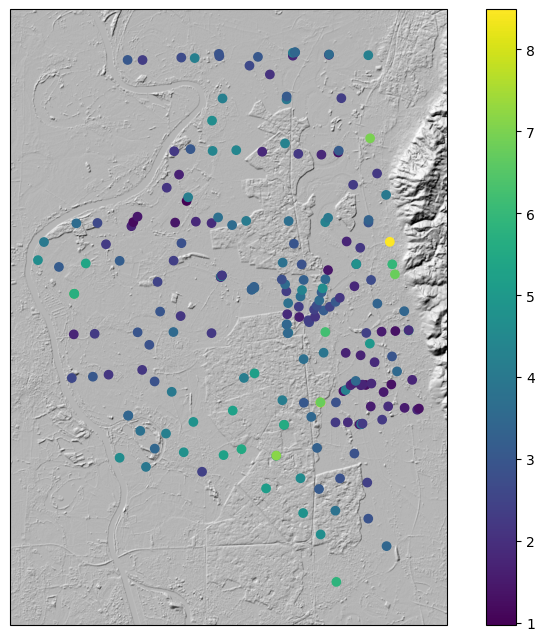

In [23]:
# Load hillshade DEM
dem_path = './data/dem/bergstraße30_shaded.tif'
gs_extent = gs.geometry.total_bounds

with rasterio.open(dem_path) as src:
    dem = src.read(1)
    dem_extent = src.bounds

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 8), 
                       subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
ax.imshow(dem, extent=(dem_extent[0], dem_extent[2],
                       dem_extent[1], dem_extent[3]),
          cmap='gray', origin='upper', aspect='auto')

gs_agg.plot(column='mean_water_depth',
            #cmap='coolwarm',
            legend=True, 
            ax=ax)

ax.set_xlim(gs_extent[0]-0.02, gs_extent[2]+0.02)
ax.set_ylim(gs_extent[1]-0.02, gs_extent[3]+0.02)

#ax.legend(loc='lower left', framealpha=0.5)

# Show the plot
plt.show()

In [24]:
g_merged = pd.merge(g, gs, how='left')
g_merged.head()

,station_id,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry
0,13595,9.48,89.76,8.45,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)
1,13595,9.49,89.75,8.46,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)
2,13595,9.89,89.35,8.86,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)
3,13595,9.98,89.26,8.95,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)
4,13595,10.00,89.24,8.97,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)


In [25]:
g_merged.describe()

,station_id,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,ground_elev,measure_elev,lifespan
count,557260.000000,554273.000000,554273.000000,554273.000000,66890.00000,557260.000000,5.572600e+05,557260,557260,557260.000000,557260.000000,557260
mean,13589.102144,3.594004,89.469690,3.220631,12.27388,465759.276823,5.501905e+06,1966-12-22 22:03:30.291784800,2017-11-11 00:57:30.511431168,92.696878,93.146810,18586 days 02:54:00.219646208
min,12890.000000,0.000000,81.140000,-0.870000,2.02000,453983.000000,5.487354e+06,1912-01-01 00:00:00,1966-01-01 00:00:00,86.450000,86.500000,134 days 00:00:00
25%,13157.000000,2.500000,86.900000,2.100000,11.30000,461900.003000,5.497120e+06,1953-01-01 00:00:00,2024-03-01 00:00:00,90.300000,90.520000,15765 days 00:00:00
50%,13568.000000,3.360000,89.240000,3.030000,12.00000,466857.965000,5.501588e+06,1973-01-01 00:00:00,2024-03-01 00:00:00,92.910000,93.220000,18322 days 00:00:00
75%,13774.000000,4.400000,92.090000,4.040000,12.90000,469927.000000,5.505957e+06,1978-01-01 00:00:00,2024-03-01 00:00:00,95.170000,95.760000,23801 days 00:00:00
max,17794.000000,11.160000,96.270000,10.790000,21.30000,473615.000000,5.514651e+06,2013-01-01 00:00:00,2024-03-01 00:00:00,99.920000,100.560000,40968 days 00:00:00
std,609.112889,1.527469,3.005891,1.476485,1.55057,4829.443303,6.203696e+03,NaN,NaN,2.982003,3.032113,6842 days 14:06:22.419255168


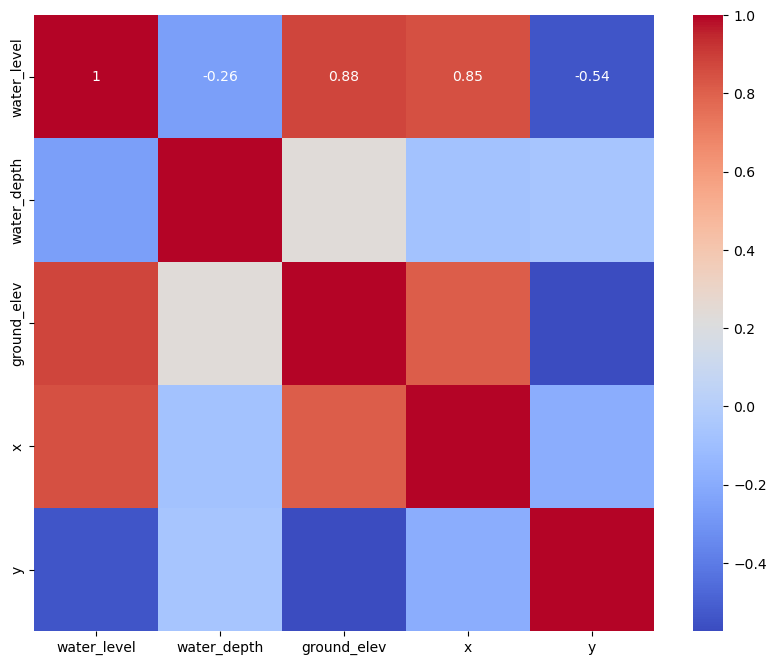

In [26]:
corr_mat = g_merged[['water_level', 'water_depth', 'ground_elev', 'x', 'y']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()


<Axes: xlabel='date', ylabel='water_depth'>

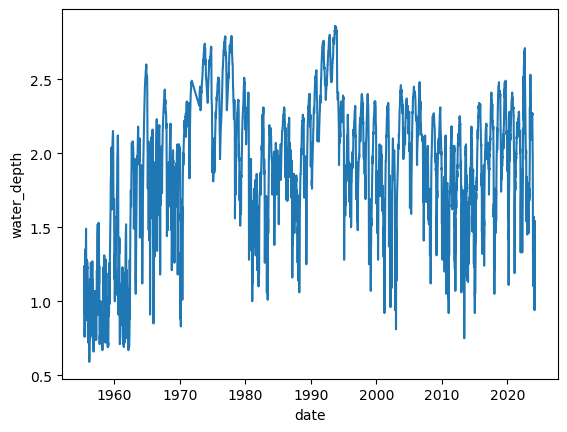

In [27]:
g_filtered = g.loc[g.station_id == 13589]

sns.lineplot(x="date", y="water_depth",
             #hue="station_id", 
             #style="event",
             #palette='tab10',
             data=g_filtered)

In [28]:
g_filtered.index.min()

Timestamp('1955-05-18 00:00:00')

In [29]:
date_diffs = g.index.to_series().diff()
date_diffs.value_counts()

date
7 days         456078
1 days          91622
14 days          2440
6 days           1442
8 days           1274
                ...  
-728 days           1
-18417 days         1
44 days             1
-26896 days         1
1258 days           1
Name: count, Length: 364, dtype: int64

## Load regional weather data

In [30]:
w = pd.read_csv('./data/weather_collections/weather_daily_region.csv')

# change date column to datetime type
w.date = pd.to_datetime(w.date)#, format='%Y%m%d')
w.set_index('date', inplace=True)
w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53357 entries, 1876-01-01 to 2022-12-31
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station_id_count  53357 non-null  int64  
 1   precip_mean       53356 non-null  float64
 2   precip_min        53356 non-null  float64
 3   precip_max        53356 non-null  float64
 4   precip_std        28854 non-null  float64
 5   tmean_mean        53357 non-null  float64
 6   tmean_min         53357 non-null  float64
 7   tmean_max         53357 non-null  float64
 8   tmean_std         28855 non-null  float64
 9   tmax_mean         53357 non-null  float64
 10  tmax_min          53357 non-null  float64
 11  tmax_max          53357 non-null  float64
 12  tmax_std          28855 non-null  float64
 13  tmin_mean         53357 non-null  float64
 14  tmin_min          53357 non-null  float64
 15  tmin_max          53357 non-null  float64
 16  tmin_std          28855

In [31]:
date_diffs = w.index.to_series().diff()
date_diffs.value_counts()

date
1 days      53355
335 days        1
Name: count, dtype: int64

In [32]:
# calculate cumulative precipitation for 7 day moving window
w['precip_mean_prev_7d_sum'] = w['precip_mean'].rolling(window=7).sum()
w['precip_mean_prev_30d_sum'] = w['precip_mean'].rolling(window=30).sum()
w['tmean_mean_prev_7d_mean'] = w['tmean_mean'].rolling(window=7).mean()
w['tmean_mean_prev_30d_mean'] = w['tmean_mean'].rolling(window=30).mean()
#w.head(10)

## Merge weather and groundwater

In [43]:
g_merged.head()

,station_id,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry
0,13595,9.48,89.76,8.45,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)
1,13595,9.49,89.75,8.46,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)
2,13595,9.89,89.35,8.86,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)
3,13595,9.98,89.26,8.95,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)
4,13595,10.00,89.24,8.97,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114)


In [44]:
w.head()

,station_id_count,precip_mean,precip_min,precip_max,precip_std,tmean_mean,tmean_min,tmean_max,tmean_std,tmax_mean,...,tmin_max,tmin_std,moisture_mean,moisture_min,moisture_max,moisture_std,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean
date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,1,1.8,1.8,1.8,NaN,-0.2,-0.2,-0.2,NaN,2.0,...,-1.0,NaN,88.0,88.0,88.0,NaN,NaN,NaN,NaN,NaN
1876-01-02,1,20.6,20.6,20.6,NaN,2.8,2.8,2.8,NaN,3.2,...,-1.5,NaN,96.0,96.0,96.0,NaN,NaN,NaN,NaN,NaN
1876-01-03,1,7.6,7.6,7.6,NaN,6.0,6.0,6.0,NaN,8.0,...,3.0,NaN,95.0,95.0,95.0,NaN,NaN,NaN,NaN,NaN
1876-01-04,1,1.0,1.0,1.0,NaN,-1.9,-1.9,-1.9,NaN,8.0,...,-6.0,NaN,91.0,91.0,91.0,NaN,NaN,NaN,NaN,NaN
1876-01-05,1,1.0,1.0,1.0,NaN,-6.2,-6.2,-6.2,NaN,-3.0,...,-9.0,NaN,82.0,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [42]:
m = pd.merge(g_merged, w['precip_mean_prev_30d_sum'],
             how='left', left_index=True, right_index=True)
m

,station_id,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry,precip_mean_prev_30d_sum
0,13595,9.48,89.76,8.45,NaN,468527.000,5496600.000,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114),NaN
1,13595,9.49,89.75,8.46,NaN,468527.000,5496600.000,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114),NaN
2,13595,9.89,89.35,8.86,NaN,468527.000,5496600.000,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114),NaN
3,13595,9.98,89.26,8.95,NaN,468527.000,5496600.000,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114),NaN
4,13595,10.00,89.24,8.97,NaN,468527.000,5496600.000,1978-01-01,2024-03-01,98.21,99.24,16861 days,POINT (8.56426 49.62114),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557255,13157,2.03,87.78,2.13,NaN,465408.641,5514423.336,1976-01-01,1976-09-01,89.91,89.81,244 days,POINT (8.51951 49.78128),NaN
557256,13157,1.90,87.91,2.00,NaN,465408.641,5514423.336,1976-01-01,1976-09-01,89.91,89.81,244 days,POINT (8.51951 49.78128),NaN
557257,13157,1.80,88.01,1.90,NaN,465408.641,5514423.336,1976-01-01,1976-09-01,89.91,89.81,244 days,POINT (8.51951 49.78128),NaN
557258,13157,1.79,88.02,1.89,NaN,465408.641,5514423.336,1976-01-01,1976-09-01,89.91,89.81,244 days,POINT (8.51951 49.78128),NaN


## Check weather vs groundwater

In [38]:
m = pd.merge(g_filtered, w['precip_mean_prev_30d_sum'],
             how='left', left_index=True, right_index=True)
m.head()

,station_id,water_dist,water_level,water_depth,water_temp,precip_mean_prev_30d_sum
date,,,,,,
1912-10-15,12901,0.0,87.29,3.27,NaN,15.9
1912-11-15,12901,0.0,87.39,3.17,NaN,78.5
1912-12-15,12901,0.0,87.41,3.15,NaN,36.5
1913-01-15,12901,0.0,87.55,3.01,NaN,51.8
1913-02-15,12901,0.0,87.62,2.94,NaN,60.9


/tmp/ipykernel_33175/1011745856.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="date", y="water_depth",


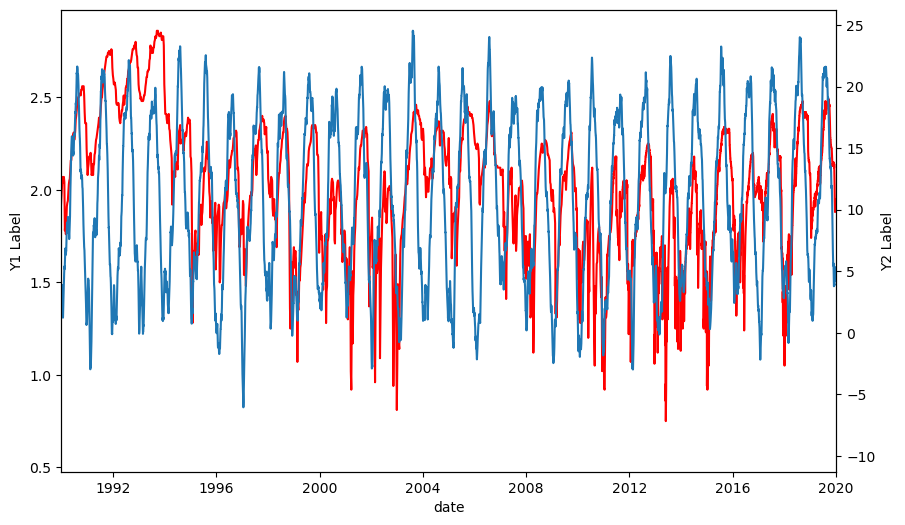

In [39]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first DataFrame on the primary y-axis
sns.lineplot(x="date", y="water_depth",
             #hue="station_id", 
             #style="event",
             palette='tab10',
             color='r',
             data=g_filtered,
             ax=ax)

# Create a secondary y-axis
ax2 = ax.twinx()

# Plot the second DataFrame on the secondary y-axis
sns.lineplot(x="date", y="tmean_mean_prev_30d_mean", 
             data=w,#['1983-01':'1985-01'], # filter dates here
             ax=ax2, 
             #color='r'
            )

# Optionally, set labels for the y-axes
ax.set_ylabel('Y1 Label')
ax2.set_ylabel('Y2 Label')

# Set the x-axis limits
start_date = pd.to_datetime('1990-01-01')
end_date = pd.to_datetime('2020-01-10')
plt.xlim(start_date, end_date)

# Show the plot
plt.show()

In [25]:
# Calculate cross-correlation for different lag values
max_lag = 30  # Maximum lag to consider (adjust as needed)
#lags = np.arange(-max_lag, max_lag + 1)
lags = np.arange(0, max_lag + 1)
correlations = [w['tmean_mean_prev_30d_mean'].corr(g_filtered['water_depth'].shift(-lag)) for lag in lags]
print(max(correlations), correlations)

# Find lag with highest correlation
optimal_lag = lags[np.argmax(correlations)]

# Calculate lagged groundwater levels
g_filtered_lagged = g_filtered.shift(-optimal_lag)

# Calculate average lag time
average_lag_time = np.mean(optimal_lag)
print("Average lag time:", average_lag_time)

0.4640165858174831 [0.41834227515475614, 0.4322263475442658, 0.44347096013202364, 0.4517412843447467, 0.4578247847586221, 0.46202016505000754, 0.4640165858174831, 0.4634799158219369, 0.4603708347900513, 0.45511546967298744, 0.44771326389717286, 0.43877872625594694, 0.42828543449685735, 0.41654862438063833, 0.4026098319767278, 0.38696155113112346, 0.36991605930753907, 0.3523295222320072, 0.334872197705065, 0.31764437031976395, 0.30058283013505793, 0.28375132639939316, 0.26696810834766227, 0.2508129317278215, 0.23529272096082607, 0.22085598592018357, 0.20840227728447888, 0.1978681795338355, 0.18966739244071354, 0.18336854262166244, 0.1787488646130878]
Average lag time: 6.0


/tmp/ipykernel_16357/1809473913.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="date", y="water_depth",
/tmp/ipykernel_16357/1809473913.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="date", y="water_depth",


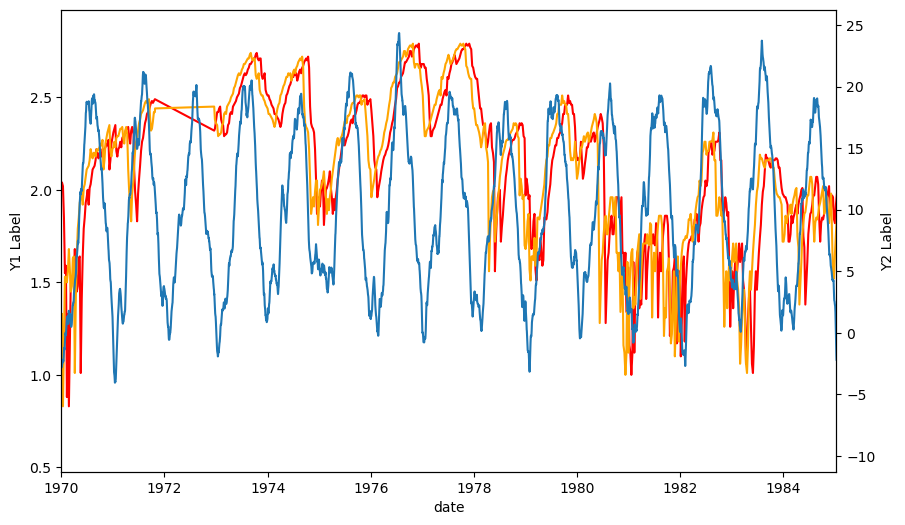

In [26]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first DataFrame on the primary y-axis
sns.lineplot(x="date", y="water_depth",
             #hue="station_id", 
             #style="event",
             palette='tab10',
             color='r',
             data=g_filtered,
             ax=ax)

# Plot the first DataFrame on the primary y-axis
sns.lineplot(x="date", y="water_depth",
             #hue="station_id", 
             #style="event",
             palette='tab10',
             color='orange',
             data=g_filtered_lagged,
             ax=ax)

# Create a secondary y-axis
ax2 = ax.twinx()

# Plot the second DataFrame on the secondary y-axis
sns.lineplot(x="date", y="tmean_mean_prev_30d_mean", 
             data=w,#['1983-01':'1985-01'], # filter dates here
             ax=ax2, 
             #color='r'
            )

# Optionally, set labels for the y-axes
ax.set_ylabel('Y1 Label')
ax2.set_ylabel('Y2 Label')

# Set the x-axis limits
start_date = pd.to_datetime('1970-01-01')
end_date = pd.to_datetime('1985-01-10')
plt.xlim(start_date, end_date)

# Show the plot
plt.show()

## Idea for modeling strategy

1. split in test, train and deployment data
2. Model for groundwater signal lag: for each training station, calculate the actual lag times. then try to train a model for the lag times based on groundwater depth, location?, ...
3. use predicted lag to shift gw train data to be in phase with precip data
4. train model to predict the magnitude of shifted gw level fluctuation based on weather (mainly precip?)
5. predict the lag of gw level test data, shift and then predict magnitude; back-shift and compare with true values --> asses model performance (good metrics?)

NameError: name 'np' is not defined